<a href="https://colab.research.google.com/github/anonomi-og/reddit-sub-analysis/blob/main/Subreddit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

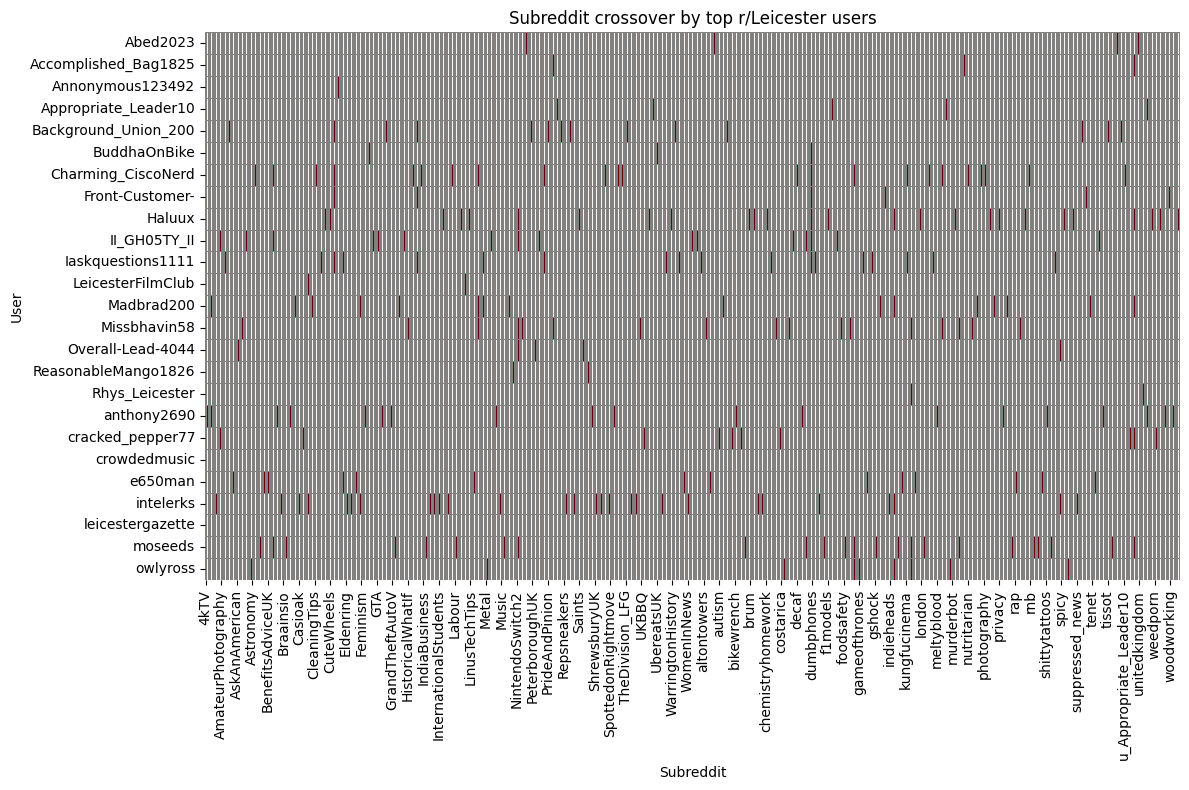

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to BigQuery
client = bigquery.Client(project="subreddit-analysis-467210")

# Load data
query = """
SELECT author, subreddit, SUM(count) AS total_count
FROM `subreddit-analysis-467210.subreddit.user_subreddit_activity`
GROUP BY author, subreddit
"""
df = client.query(query).to_dataframe()

# Pivot to user–subreddit matrix
pivot = df.pivot_table(index="author", columns="subreddit", values="total_count", fill_value=0)

# Optional: binarise (1 = has posted/commented in that subreddit)
binary = pivot.gt(0).astype(int)

# Show heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(binary, cmap="Reds", linewidths=0.5, linecolor="gray", cbar=False)
plt.title("Subreddit crossover by top r/Leicester users")
plt.xlabel("Subreddit")
plt.ylabel("User")
plt.tight_layout()
plt.show()


In [24]:
df.head()

,author,subreddit,total_count
0,Rhys_Leicester,leicester,298
1,Iaskquestions1111,leicester,81
2,Iaskquestions1111,DIYUK,29
3,Iaskquestions1111,HomeImprovement,20
4,Missbhavin58,televisionsuggestions,28


In [3]:
# Filter out subreddits used by only one user
subreddit_usage = binary.sum(axis=0)
shared_subs = subreddit_usage[subreddit_usage > 1].index
filtered = binary[shared_subs]


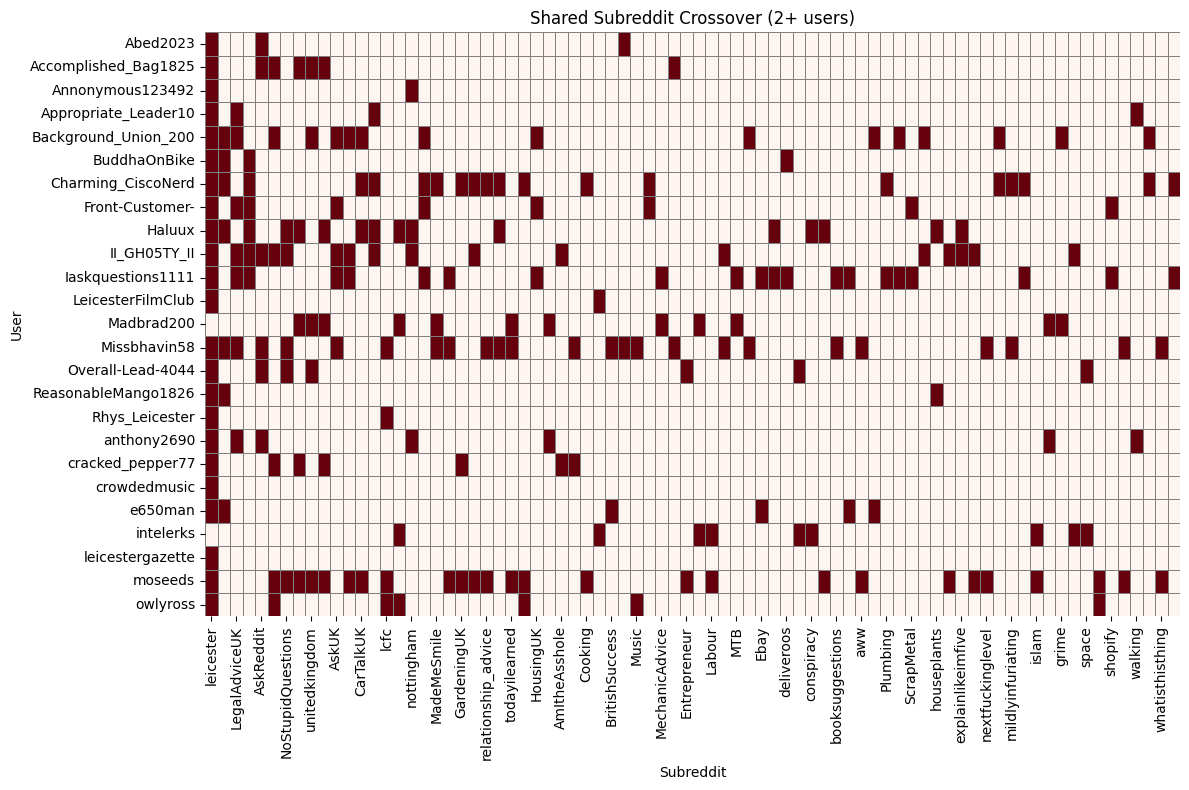

In [4]:
# Filter out subreddits used by only one user
subreddit_usage = binary.sum(axis=0)
shared_subs = subreddit_usage[subreddit_usage > 1].index
filtered = binary[shared_subs]

# Sort the filtered DataFrame by subreddit usage
sorted_shared_subs = subreddit_usage[shared_subs].sort_values(ascending=False).index
filtered_sorted = filtered[sorted_shared_subs]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_sorted, cmap="Reds", linewidths=0.5, linecolor="gray", cbar=False)
plt.title("Shared Subreddit Crossover (2+ users)")
plt.xlabel("Subreddit")
plt.ylabel("User")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Show count of users per subreddit
user_counts = binary.sum().sort_values(ascending=False).reset_index()
user_counts.columns = ["subreddit", "num_users"]
user_counts.head(20)  # top 20 subreddits by user count


,subreddit,num_users
0,leicester,23
1,LegalAdviceUK,7
2,CasualUK,7
3,drivingUK,6
4,AskBrits,6
5,AskReddit,6
6,NoStupidQuestions,5
7,AskUK,5
8,uknews,5
9,ukpolitics,5


In [12]:
# Display the sorted binary table (as seen in heatmap)
filtered_sorted.head(10)  # top 10 users × top shared subreddits


subreddit,leicester,CasualUK,LegalAdviceUK,drivingUK,AskReddit,AskBrits,NoStupidQuestions,uknews,unitedkingdom,ukpolitics,...,grime,nhs,space,soccer,shopify,vegan,walking,whatisit,whatisthisthing,woodworking
author,,,,,,,,,,,,,,,,,,,,,
Abed2023,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Accomplished_Bag1825,1,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Annonymous123492,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Appropriate_Leader10,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Background_Union_200,1,1,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
BuddhaOnBike,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charming_CiscoNerd,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Front-Customer-,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Haluux,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
summary_table = filtered_sorted.sum().sort_values(ascending=False).reset_index()
summary_table.columns = ["subreddit", "num_users"]
summary_table["example_users"] = summary_table["subreddit"].apply(
    lambda sub: filtered_sorted[filtered_sorted[sub] == 1].index.tolist()
)
summary_table.head(10)


,subreddit,num_users,example_users
0,leicester,23,"[Abed2023, Accomplished_Bag1825, Annonymous123..."
1,CasualUK,7,"[Background_Union_200, BuddhaOnBike, Charming_..."
2,LegalAdviceUK,7,"[Appropriate_Leader10, Background_Union_200, F..."
3,drivingUK,6,"[BuddhaOnBike, Charming_CiscoNerd, Front-Custo..."
4,AskReddit,6,"[Abed2023, Accomplished_Bag1825, II_GH05TY_II,..."
5,AskBrits,6,"[Accomplished_Bag1825, Background_Union_200, I..."
6,NoStupidQuestions,5,"[Haluux, II_GH05TY_II, Missbhavin58, Overall-L..."
7,uknews,5,"[Accomplished_Bag1825, Haluux, Madbrad200, cra..."
8,unitedkingdom,5,"[Accomplished_Bag1825, Background_Union_200, M..."
9,ukpolitics,5,"[Accomplished_Bag1825, Haluux, Madbrad200, cra..."


In [6]:
!pip install networkx


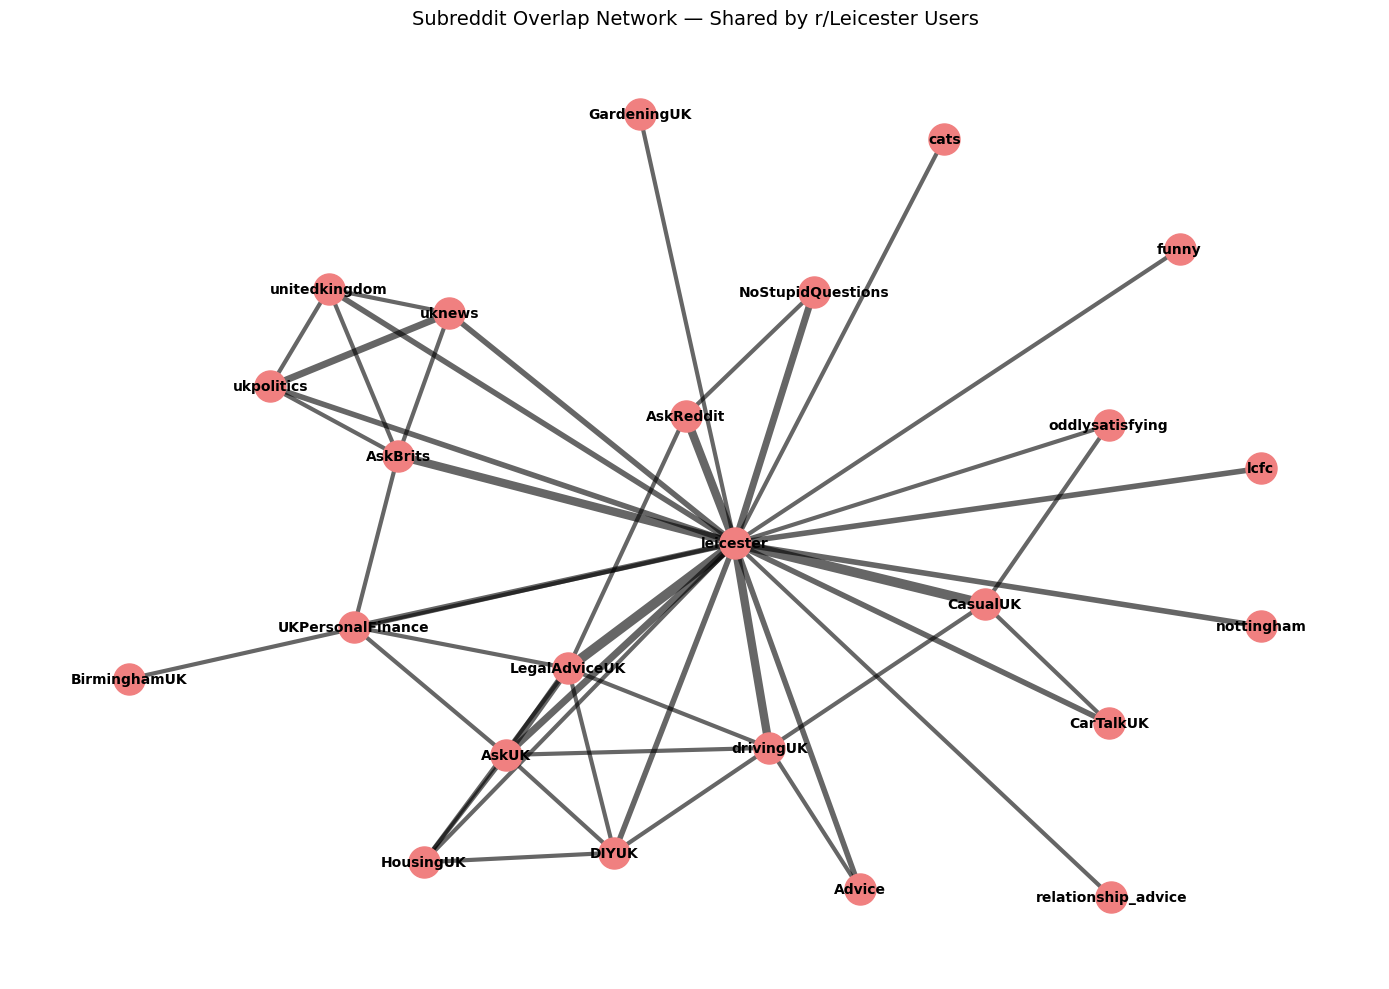

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Step 1: Build a dictionary {author: [list of subreddits]}
author_groups = df[df["total_count"] > 0].groupby("author")["subreddit"].apply(list)

# Step 2: Count subreddit pairs co-used by the same author
edge_weights = {}

for subs in author_groups:
    for a, b in combinations(set(subs), 2):
        key = tuple(sorted((a, b)))
        edge_weights[key] = edge_weights.get(key, 0) + 1

# Step 3: Build the graph
G = nx.Graph()
for (a, b), weight in edge_weights.items():
    if weight > 2:  # Only include meaningful links
        G.add_edge(a, b, weight=weight)

# Step 4: Visualise the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Draw nodes and edges
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightcoral")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (_, _, d) in edges], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Subreddit Overlap Network — Shared by r/Leicester Users", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


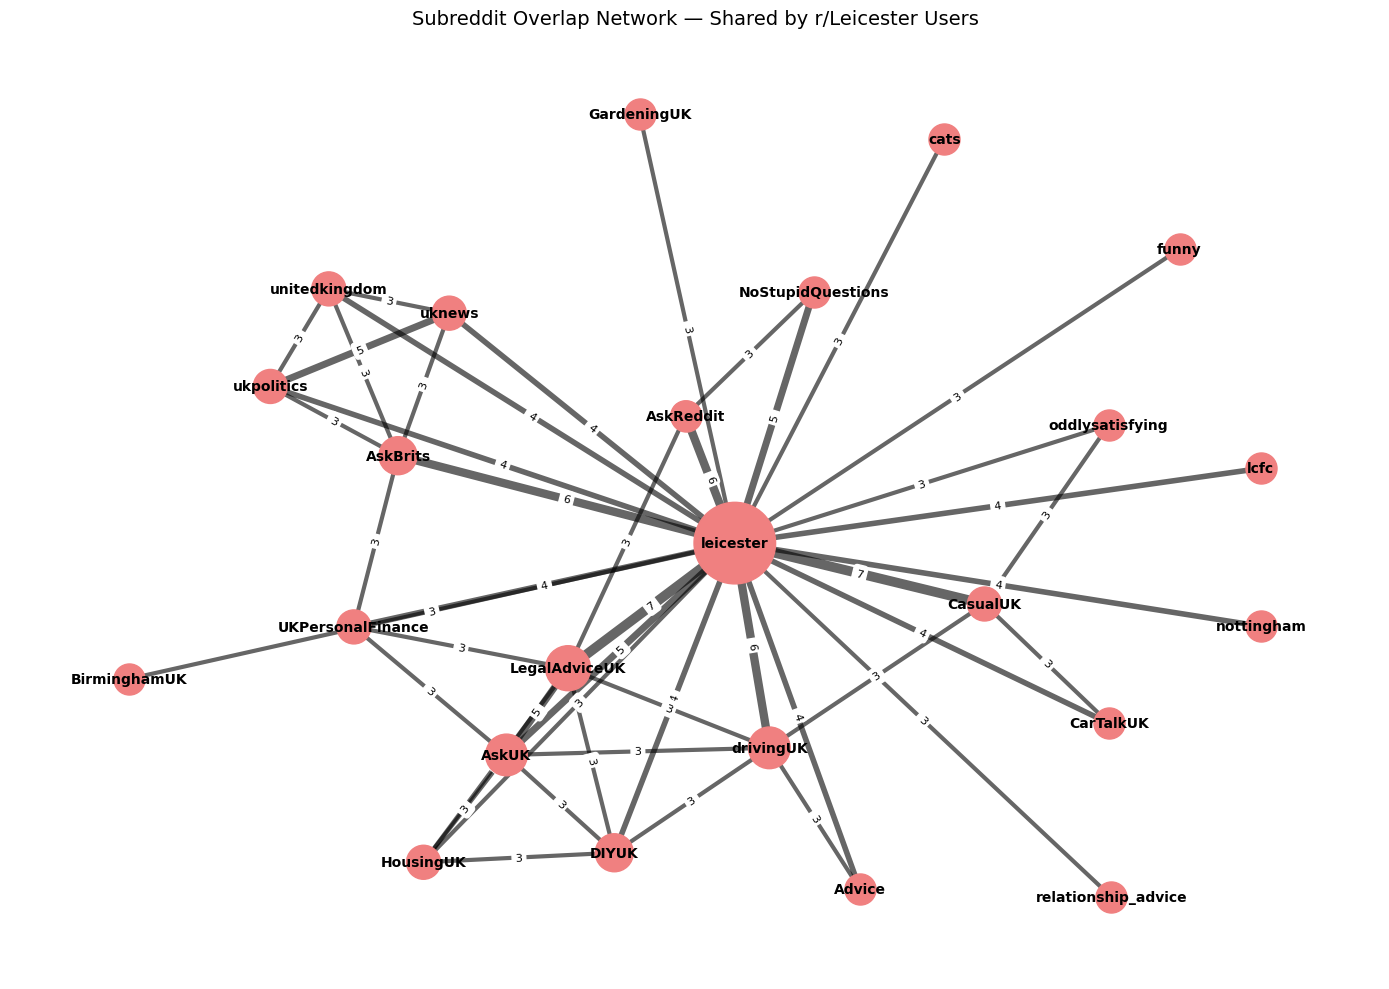

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Step 1: Build a dictionary {author: [list of subreddits]}
author_groups = df[df["total_count"] > 0].groupby("author")["subreddit"].apply(list)

# Step 2: Count subreddit pairs co-used by the same author
edge_weights = {}

for subs in author_groups:
    for a, b in combinations(set(subs), 2):
        key = tuple(sorted((a, b)))
        edge_weights[key] = edge_weights.get(key, 0) + 1

# Step 3: Build the graph
G = nx.Graph()
for (a, b), weight in edge_weights.items():
    if weight > 2:  # Only include meaningful links
        G.add_edge(a, b, weight=weight)

# Step 4: Visualise the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Draw nodes and edges
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightcoral")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (_, _, d) in edges], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

#To show how many users connect each subreddit pair:
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

#Size nodes by popularity
node_sizes = [G.degree(n) * 150 for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightcoral")


plt.title("Subreddit Overlap Network — Shared by r/Leicester Users", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

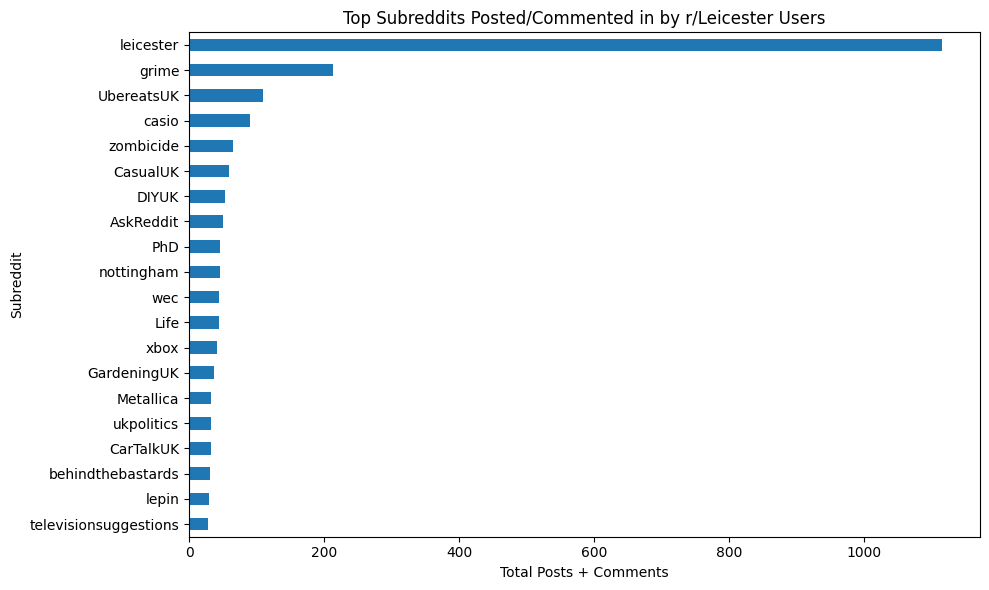

In [19]:
df.groupby("subreddit")["total_count"].sum().sort_values(ascending=False).head(20).plot(
    kind='barh', figsize=(10, 6)
)
plt.title("Top Subreddits Posted/Commented in by r/Leicester Users")
plt.xlabel("Total Posts + Comments")
plt.ylabel("Subreddit")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


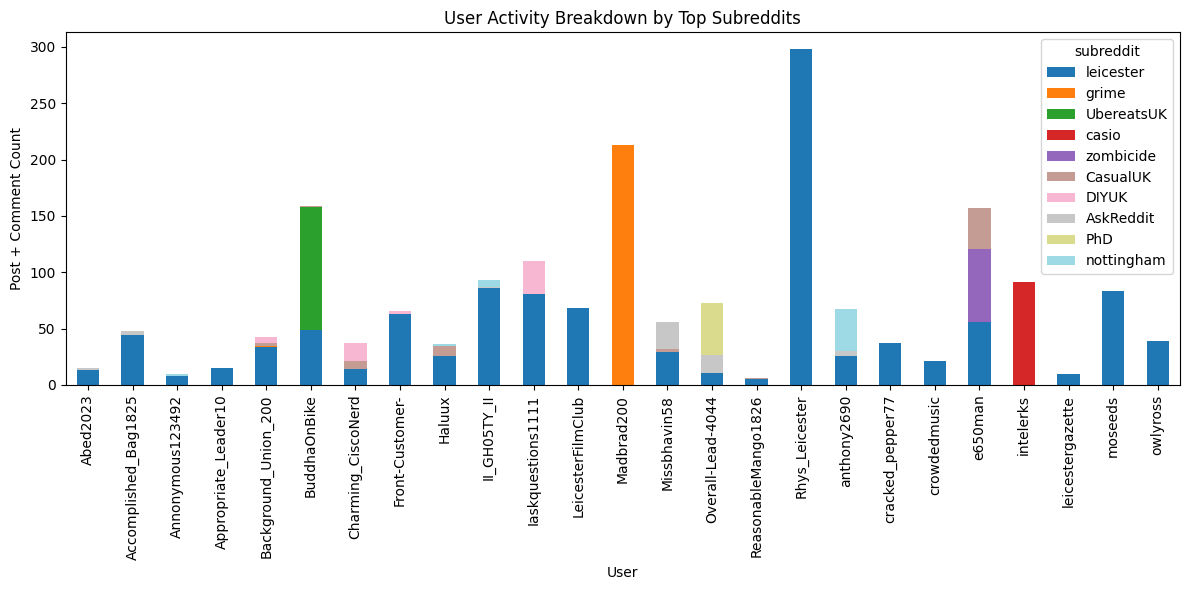

In [20]:
pivot = df.pivot_table(index="author", columns="subreddit", values="total_count", fill_value=0)
pivot_top = pivot.loc[:, pivot.sum().sort_values(ascending=False).head(10).index]  # top 10 subs only

pivot_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("User Activity Breakdown by Top Subreddits")
plt.ylabel("Post + Comment Count")
plt.xlabel("User")
plt.tight_layout()
plt.show()


In [21]:
import plotly.graph_objects as go

# Filter top subreddits for clarity
top = df[df["total_count"] > 0]
top = top[top["subreddit"].isin(top["subreddit"].value_counts().head(10).index)]

# Create unique label list
authors = top["author"].unique().tolist()
subs = top["subreddit"].unique().tolist()
labels = authors + subs

# Map source/target to index
source = top["author"].apply(lambda x: labels.index(x))
target = top["subreddit"].apply(lambda x: labels.index(x))
value = top["total_count"]

# Build Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title="Flow from Users to Subreddits", font=dict(size=10))
fig.show()


In [22]:
pivot = df.pivot_table(index="author", columns="subreddit", values="total_count", fill_value=0)
pivot.head(10)


subreddit,4kTV,AFCBournemouth,AITAH,AITA_WIBTA_PUBLIC,AMA,AccidentalRenaissance,Advice,Agriculture,AirTravelIndia,AlicizationLycoris,...,womenintech,woodstoving,woodworking,worldnews,xbox,xboxone,yakuzagames,york,yorkshire,zombicide
author,,,,,,,,,,,,,,,,,,,,,
Abed2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Accomplished_Bag1825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Annonymous123492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Appropriate_Leader10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Background_Union_200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BuddhaOnBike,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charming_CiscoNerd,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Front-Customer-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Haluux,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Task
Create a heatmap of combined posts and comments activity by hour of the day and day of the week using data from the "comments" and "posts" tables in BigQuery.

## Query data

### Subtask:
Retrieve the `created_utc` (timestamp) from both the `comments` and `posts` tables in BigQuery.


**Reasoning**:
Retrieve the `created_utc` column from the `comments` table in BigQuery and store it in a DataFrame.



In [25]:
query_comments = """
SELECT created_utc
FROM `subreddit-analysis-467210.subreddit.comments`
"""
df_comments = client.query(query_comments).to_dataframe()
df_comments.head()

,created_utc
0,2025-05-14 18:25:28+00:00
1,2025-05-14 19:27:41+00:00
2,2025-05-14 19:53:12+00:00
3,2025-05-14 12:41:22+00:00
4,2025-05-14 12:55:45+00:00


**Reasoning**:
Retrieve the `created_utc` column from the `posts` table in BigQuery and store it in a DataFrame.



In [26]:
query_posts = """
SELECT created_utc
FROM `subreddit-analysis-467210.subreddit.posts`
"""
df_posts = client.query(query_posts).to_dataframe()
df_posts.head()

,created_utc
0,2025-03-19 15:01:29+00:00
1,2025-03-19 08:54:29+00:00
2,2025-03-19 10:44:14+00:00
3,2025-03-19 10:31:39+00:00
4,2025-02-23 15:19:51+00:00


## Combine data

### Subtask:
Combine the results from the two queries into a single DataFrame.


**Reasoning**:
Concatenate the two dataframes and display the head to verify.



In [27]:
df_combined = pd.concat([df_comments, df_posts])
display(df_combined.head())

,created_utc
0,2025-05-14 18:25:28+00:00
1,2025-05-14 19:27:41+00:00
2,2025-05-14 19:53:12+00:00
3,2025-05-14 12:41:22+00:00
4,2025-05-14 12:55:45+00:00


## Extract time information

### Subtask:
From the `created_utc` column, extract the hour of the day and the day of the week.


**Reasoning**:
Extract the hour and day of the week from the 'created_utc' column in the combined DataFrame and display the results.



In [28]:
df_combined['created_utc'] = pd.to_datetime(df_combined['created_utc'])
df_combined['hour'] = df_combined['created_utc'].dt.hour
df_combined['day_of_week'] = df_combined['created_utc'].dt.dayofweek
display(df_combined.head())

,created_utc,hour,day_of_week
0,2025-05-14 18:25:28+00:00,18,2
1,2025-05-14 19:27:41+00:00,19,2
2,2025-05-14 19:53:12+00:00,19,2
3,2025-05-14 12:41:22+00:00,12,2
4,2025-05-14 12:55:45+00:00,12,2


## Aggregate data

### Subtask:
Group the data by day of the week and hour, and count the number of entries for each combination.


**Reasoning**:
Group the data by day of the week and hour, count the occurrences, reset the index, and rename the columns.



In [29]:
activity_by_time = df_combined.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
activity_by_time.columns = ['day_of_week', 'hour', 'count']
display(activity_by_time.head())

,day_of_week,hour,count
0,0,0,32
1,0,1,31
2,0,2,16
3,0,3,19
4,0,4,17


## Prepare for heatmap

### Subtask:
Reshape the aggregated data into a format suitable for a heatmap, with days of the week as rows and hours as columns.


**Reasoning**:
Reshape the aggregated data into a format suitable for a heatmap using the pivot method.



In [30]:
heatmap_data = activity_by_time.pivot(index='day_of_week', columns='hour', values='count')
display(heatmap_data.head())

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,32,31,16,19,17,44,36,95,80,96,...,104,149,113,119,122,114,103,84,107,78
1,35,21,13,13,17,34,35,46,65,82,...,115,153,101,148,160,176,173,120,96,64
2,39,33,19,19,15,35,58,92,119,130,...,104,165,132,163,174,148,105,159,136,50
3,39,21,10,15,17,30,59,82,130,175,...,98,95,110,145,121,110,118,117,84,60
4,39,24,22,25,27,47,60,92,128,128,...,91,96,104,93,99,115,133,112,91,59


## Generate heatmap

### Subtask:
Create a heatmap visualization of the combined activity by day and hour.


**Reasoning**:
Create a heatmap visualization of the combined activity by day and hour using the prepared data.



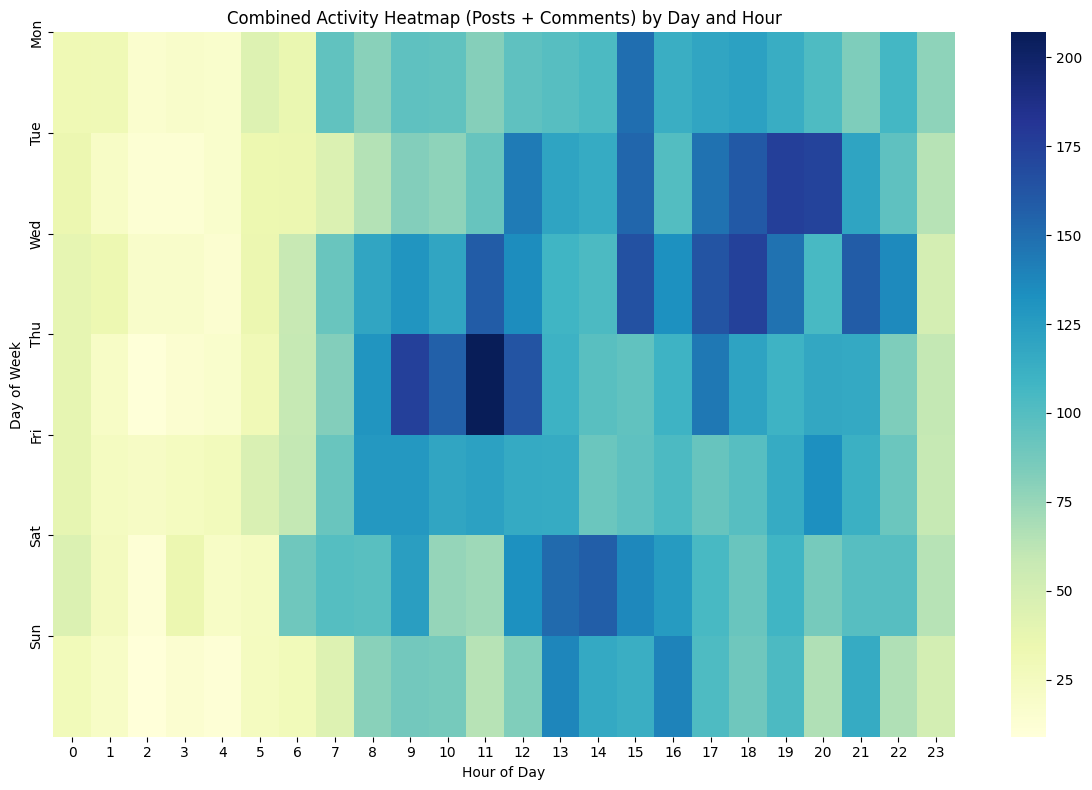

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Combined Activity Heatmap (Posts + Comments) by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.yticks(ticks=heatmap_data.index, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully combined data from both the `comments` and `posts` tables to analyze overall activity.
*   The data was aggregated to show the count of combined activity for each hour of each day of the week.
*   A heatmap visualization was generated to display the distribution of combined activity across different hours and days.

### Insights or Next Steps

*   Analyze the heatmap to identify peak hours and days of activity.
*   Further investigate the content or topics of posts and comments during peak activity times.
